<a href="https://colab.research.google.com/github/vipin-jangra/machine_leaning/blob/main/ANN_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## divide the dataset into independent and dependent features
X= dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [ ]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
## feature engineering
geogrphy = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [ ]:
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geogrphy,gender],axis=1)

In [ ]:
##spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [ ]:
##feature scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## part 2 lets create the ANN
from tensorflow.python.ops.gen_nn_ops import LeakyRelu
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
##lets initiaize the ANN
classifier=Sequential()

In [ ]:
##Adding the inpur layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
##addding the forst hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
##adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
##Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
from keras import callbacks
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3126 - accuracy: 0.8699 - val_loss: 0.3634 - val_accuracy: 0.8508
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3131 - accuracy: 0.8699 - val_loss: 0.3603 - val_accuracy: 0.8516
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3130 - accuracy: 0.8737 - val_loss: 0.3624 - val_accuracy: 0.8527
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3119 - accuracy: 0.8726 - val_loss: 0.3591 - val_accuracy: 0.8557
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3127 - accuracy: 0.8716 - val_loss: 0.3600 - val_accuracy: 0.8554
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3129 - accuracy: 0.8716 - val_loss: 0.3633 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3124 - accuracy: 0.8711 - val_loss: 0.3597 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

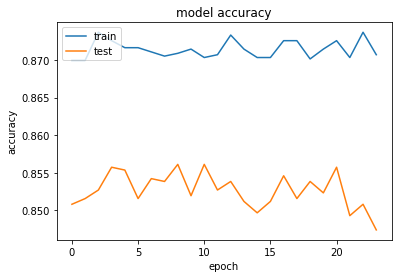

In [ ]:
## summarize the hostory for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
## part - 3 Making the predictions and evaluating the model

#predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1513,   82],
       [ 198,  207]])

In [ ]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [ ]:
score

0.86

In [ ]:
##get the weights 
classifier.get_weights()


[array([[ 0.55476034, -0.11981787,  0.4279226 , -0.13147084,  0.10354705,
         -0.24457306,  0.02892732, -0.25308836,  0.14156261, -0.20806779,
         -0.03899894],
        [-0.73264813,  0.22199288, -0.33685702,  0.45625857,  0.6581531 ,
          0.7410535 ,  1.2055383 , -0.22208098,  0.78299236, -0.6179227 ,
          0.36971602],
        [ 0.14532034,  0.04030609, -0.13747576,  0.06191823,  0.14813495,
          0.31998032, -0.32078025, -0.24393843,  0.03156412,  0.07855444,
         -0.01047792],
        [ 0.17566007, -0.11005617, -0.30708644, -0.76436406,  0.07554056,
         -0.67042154,  0.45166743, -0.12228794,  0.6627647 , -0.17602873,
          0.1611519 ],
        [ 0.08378208,  0.00689073,  0.54376113, -0.9675337 ,  0.52383065,
         -0.4363182 , -0.15194288, -0.14416675,  0.3885344 ,  0.12115974,
          1.1142118 ],
        [-0.32363686, -0.46901757,  0.03934722,  0.0313395 , -0.07854648,
         -0.12022497,  0.08942175, -0.05043476, -0.20591949, -0.3471643